In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables


['measurement', 'station']

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.(SQL)
most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

Most recent date:('2017-08-23',)
One year before most recent date: 2016-08-23


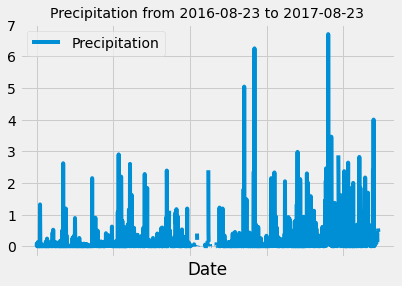

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f'Most recent date:{most_recent_date}')
print(f'One year before most recent date: {query_date}')
# Perform a query to retrieve the data and precipitation scores

prcp_data=session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>='2016-08-23').all()
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(prcp_data, columns=['Date', 'Precipitation'])
prcp_df.set_index('Date', inplace=True)


# Sort the dataframe by date

prcp_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
fig=prcp_df.plot.line()
plt.xlabel('Date')
plt.title(f'Precipitation from 2016-08-23 to 2017-08-23', size=14)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig("Precipitation analysis.png")

In [45]:
# Use Pandas to calcualte the summary statistics for the precipitation date
Summary_df=prcp_df.describe()
Summary_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Station.station).count()
print(f'There are a total of {total_stations} stations')

There are a total of 9 stations


In [63]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
engine.execute('Select s.station,  s.name, count(*) as Station_count FROM Station as s JOIN measurement as m on s.station=m.station group by s.name order by Station_count desc;').fetchall()



[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [77]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
avg_temperature=engine.execute("Select Avg(tobs) FROM measurement WHERE station =='USC00519281'").fetchall()
max_temperature=engine.execute("Select Max(tobs) FROM measurement WHERE station =='USC00519281'").fetchall()
Min_temperature=engine.execute("Select Min(tobs) FROM measurement WHERE station =='USC00519281'").fetchall()
print(f'The average temperature is: {avg_temperature}')
print(f'The average temperature is: {max_temperature}')
print(f'The average temperature is: {Min_temperature}')

The average temperature is: [(71.66378066378067,)]
The average temperature is: [(85.0,)]
The average temperature is: [(54.0,)]


Most recent date for station USC00519281: ('2017-08-18',)
One year before most recent date: 2016-08-18


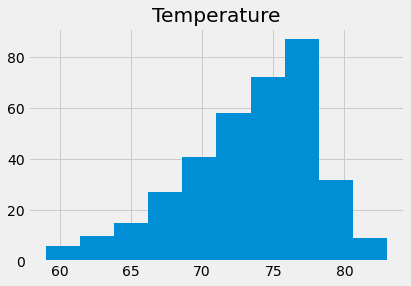

In [105]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Finding the most recent date
active_date=session.query(Measurement.date).filter(Measurement.station=='USC00519281').order_by(Measurement.date.desc()).first()
print(f'Most recent date for station USC00519281: {active_date}')

#Calculate date exactly one year before most recent date for specific station ID
query_date_active = dt.date(2017, 8, 18) - dt.timedelta(days=365)
print(f'One year before most recent date: {query_date_active}')


temp_data_active=session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date>='2016-08-18').filter(Measurement.station=='USC00519281').all()

temp_data_active

temp_df = pd.DataFrame(temp_data_active, columns=['Date', 'Temperature'])

fig_2=temp_df.hist()


# Close session

In [ ]:
# Close Session
session.close()